# **Sentimental Analysis Project Using Machine Learning**

Sentiment analysis is the process of analyzing digital text to determine if the emotional tone of the message is positive, negative, or neutral. Today, companies have large volumes of text data like emails, customer support chat transcripts, social media comments, and reviews.

In [ ]:
#Data Library
import pandas as pd
import numpy as np

#Visualization Library
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
#NLP Text Libraries
import nltk
import string
import re
import nltk.corpus

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [ ]:
#EDA Analysis
from textblob import TextBlob

#text vectorizer
from sklearn.feature_extraction.text import CountVectorizer

#Word Cloud
from wordcloud import WordCloud

In [ ]:
#Feature Engineering
#Label Econding
from sklearn.preprocessing import LabelEncoder

#Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

#Resampling
from imblearn.over_sampling import  SMOTE
from collections import Counter

#Splitting Dataset
from sklearn.model_selection import train_test_split

In [ ]:
#Model Selection and Evaluation library



In [ ]:
#Load Dataset
from google.colab import files
uploaded = files.upload()

Saving Instruments_Reviews.csv to Instruments_Reviews.csv


In [ ]:
df=pd.read_csv('Instruments_Reviews.csv')
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,7
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
#fill null values
df.reviewText.fillna(value="",inplace=True)


In [ ]:
df.isnull().sum()

,0
reviewerID,0
asin,0
reviewerName,27
helpful,0
reviewText,0
overall,0
summary,0
unixReviewTime,0
reviewTime,0


In [ ]:
#Concatenate riviewText and summary
df['review']=df['reviewText']+" "+df['summary']
df['review'].head()

,review
0,"Not much to write about here, but it does exac..."
1,The product does exactly as it should and is q...
2,The primary job of this device is to block the...
3,Nice windscreen protects my MXL mic and preven...
4,This pop filter is great. It looks and perform...


In [ ]:
df.drop(['reviewText','summary'],axis=1,inplace=True)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","Not much to write about here, but it does exac..."
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",The product does exactly as it should and is q...
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",The primary job of this device is to block the...
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",Nice windscreen protects my MXL mic and preven...
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",This pop filter is great. It looks and perform...


In [ ]:
df.describe(include='all')

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review
count,10261,10261,10234,10261,10261.000000,1.026100e+04,10261,10261
unique,1429,900,1397,269,NaN,NaN,1570,10261
top,ADH0O8UVJOT10,B003VWJ2K8,Amazon Customer,"[0, 0]",NaN,NaN,"01 22, 2013","Not much to write about here, but it does exac..."
freq,42,163,66,6796,NaN,NaN,40,1
mean,NaN,NaN,NaN,NaN,4.488744,1.360606e+09,NaN,NaN
std,NaN,NaN,NaN,NaN,0.894642,3.779735e+07,NaN,NaN
min,NaN,NaN,NaN,NaN,1.000000,1.095466e+09,NaN,NaN
25%,NaN,NaN,NaN,NaN,4.000000,1.343434e+09,NaN,NaN
50%,NaN,NaN,NaN,NaN,5.000000,1.368490e+09,NaN,NaN
75%,NaN,NaN,NaN,NaN,5.000000,1.388966e+09,NaN,NaN


In [ ]:
df.overall.value_counts()

,count
overall,
5.0,6938
4.0,2084
3.0,772
2.0,250
1.0,217


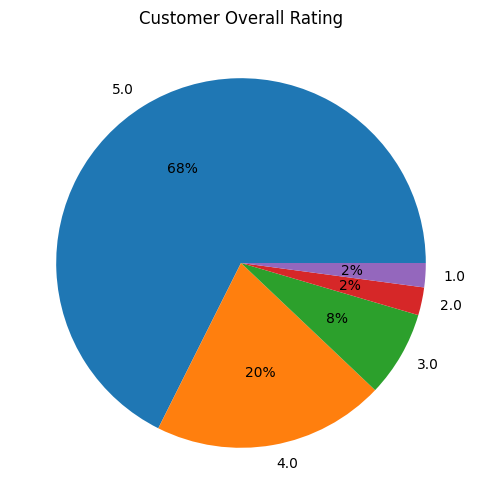

In [ ]:
df.overall.value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6,6))
plt.title('Customer Overall Rating')
plt.ylabel('')
plt.show()

In [ ]:
#Data Labelling
def Labelling(x):
  if x["overall"]>3:
    Label='Positive'
  elif x["overall"]<3:
    Label='Negative'
  else:
    Label='Neutral'
  return Label

In [ ]:
df['sentiment']=df.apply(Labelling,axis=1)

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
Positive,9022
Neutral,772
Negative,467


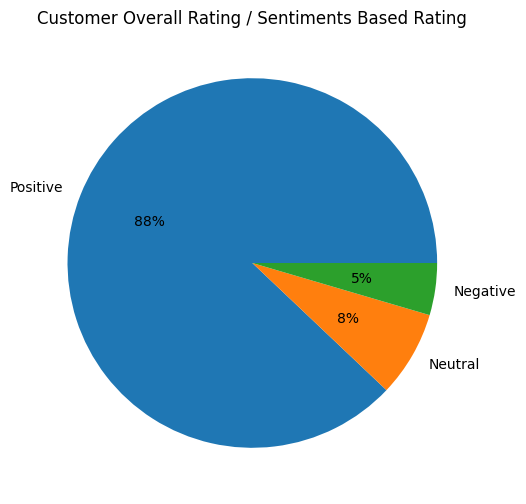

In [ ]:
df['sentiment'].value_counts().plot(kind='pie',autopct='%1.0f%%',figsize=(6,6))
plt.title('Customer Overall Rating / Sentiments Based Rating')
plt.ylabel('')
plt.show()

In [ ]:
#Text Preprocessing
def Text_clean(text):
  #lower case test
  text=text.lower()

  #Clean punctuation in the text
  punch=str.maketrans(string.punctuation,' '*len(string.punctuation))

  #Removing numbers in the text
  text=re.sub(r'\d','',text)

  #Remove white space
  text=text.strip()

  #remove possible links
  text=re.sub('https?://\s+|www\.\s+','',text)

  #remove @mentions
  text=re.sub('@\w+','',text)

  #remove newline
  text=re.sub('\n',' ',text)

  #remove extra spaces
  text=re.sub('\s+',' ',text)

  return text

In [ ]:
#Text Processing
stopwords=nltk.corpus.stopwords.words('english')

def Text_proc(text):
  prcess_text=list()
  Lemmatizer=WordNetLemmatizer()

  #Tokens of Words
  tokens=nltk.word_tokenize(text)

  for word in tokens:
    if word not in stopwords:
      word=Lemmatizer.lemmatize(word)
      prcess_text.append(word)
  return ' '.join(prcess_text)



In [ ]:
#Apply the functions
df['review']=df['review'].apply(Text_clean)
df['review']=df['review'].apply(Text_proc)

In [ ]:
df.head()

,reviewerID,asin,reviewerName,helpful,overall,unixReviewTime,reviewTime,review,sentiment
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]",5.0,1393545600,"02 28, 2014","much write , exactly 's supposed . filter pop ...",Positive
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",5.0,1363392000,"03 16, 2013",product exactly quite affordable.i realized do...,Positive
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",5.0,1377648000,"08 28, 2013",primary job device block breath would otherwis...,Positive
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",5.0,1392336000,"02 14, 2014",nice windscreen protects mxl mic prevents pop ...,Positive
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",5.0,1392940800,"02 21, 2014",pop filter great . look performs like studio f...,Positive


## **Polarity in Natural Language Processing (NLP)**

refers to the sentiment or opinion conveyed by a word, phrase, or text. It's often expressed as a numerical rating called a sentiment score, which can range from -1 to 1 or -100 to 100:

-1: A very negative sentiment, such as "awful" or "disgusting"

0: A neutral sentiment

1: A very positive sentiment, such as "excellent" or "best"


In [ ]:
#data visualizatin using polary
def polarity(text):
  return TextBlob(text).sentiment.polarity

df['polarity']=df['review'].apply(polarity)

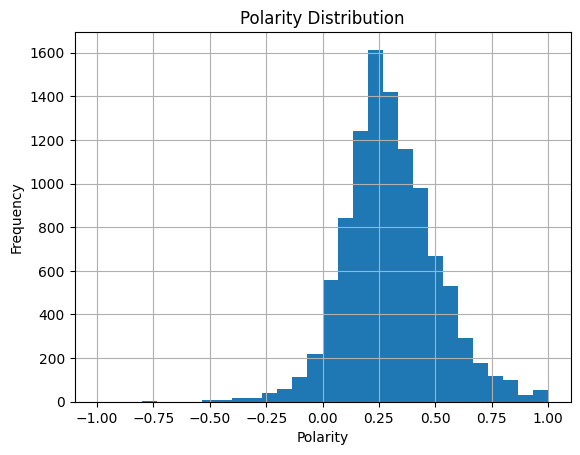

In [ ]:
#Data Visualization using histogram
df['polarity'].hist(bins=30)
plt.title('Polarity Distribution')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [ ]:
#Reviews length
df['review_length']=df['review'].apply(len)

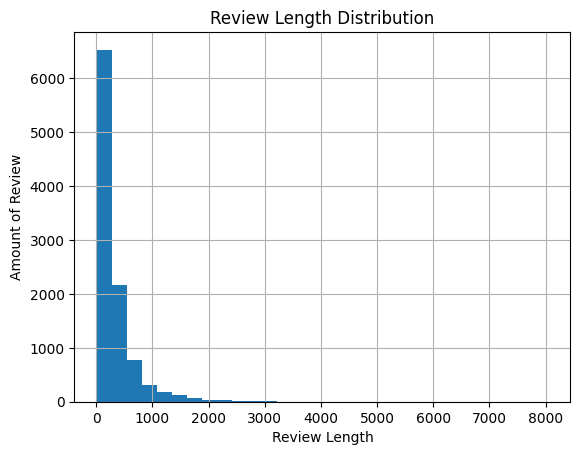

In [ ]:
#Display review length using histogram chart
df['review_length'].hist(bins=30)
plt.title('Review Length Distribution')
plt.xlabel('Review Length')
plt.ylabel('Amount of Review')
plt.show()

# **N-grams,**
a fundamental concept in NLP, play a pivotal role in capturing patterns and relationships within a sequence of words.

An N-gram language model predicts the probability of a given N-gram within any sequence of words in a language.

The N-gram language model corrects the noise by using probability knowledge

In [ ]:
#N-Gram Analysis
#ngram function
def Gram_analysis(corpus,gram,n):
  vectorizer=CountVectorizer(stop_words=stopwords,ngram_range=(gram,gram))

  #ngram matrix
  ngram=vectorizer.fit_transform(corpus)

  #N-gram frequency
  count=ngram.sum(axis=0)

  #List of words
  words=[(word,count[0,idx])for word,idx in vectorizer.vocabulary_.items()]

  #Sort the list
  words=sorted(words,key=lambda x:x[1],reverse=True)

  return words[:]


In [ ]:
#Filter the Dataframe based on Sentimental
#use dropna
Positive=df[df['sentiment']=='Positive'].dropna()
Neutral=df[df['sentiment']=='Neutral'].dropna()
Negative=df[df['sentiment']=='Negative'].dropna()

In [ ]:
#Finding Unigram
Positive_unigram=Gram_analysis(Positive['review'],1,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)
Unigram

,Word,Count
0,guitar,6596
1,great,5710
2,string,4591
3,good,4372
4,sound,4371
5,one,4368
6,like,3599
7,pedal,3484
8,use,3418
9,work,3207


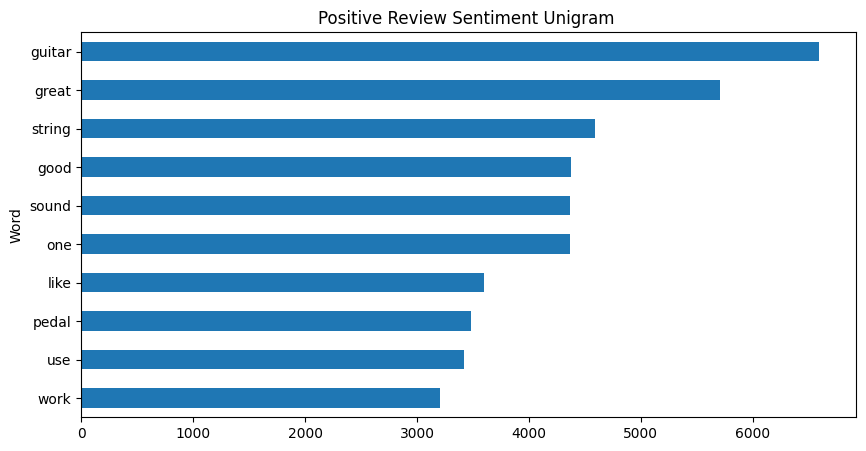

In [ ]:
#groupby count according to word
Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5))
plt.title('Positive Review Sentiment Unigram ')
plt.show()

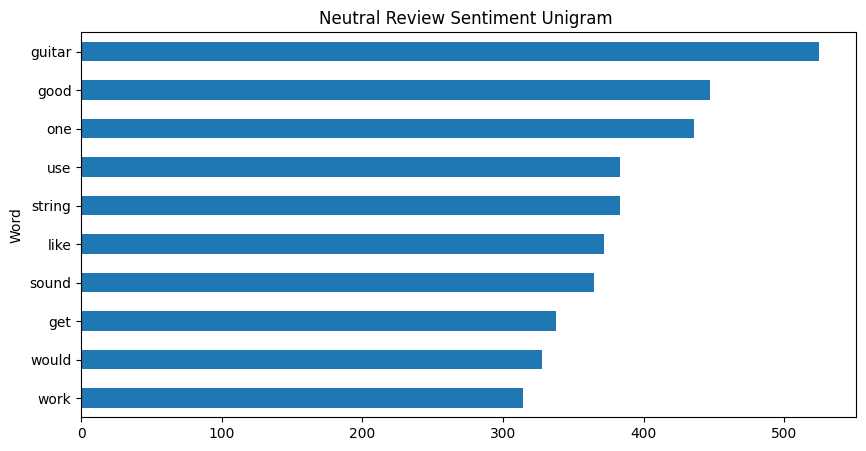

In [ ]:
#Finding Neutral Unigram
Positive_unigram=Gram_analysis(Neutral['review'],1,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5))
plt.title('Neutral Review Sentiment Unigram ')
plt.show()

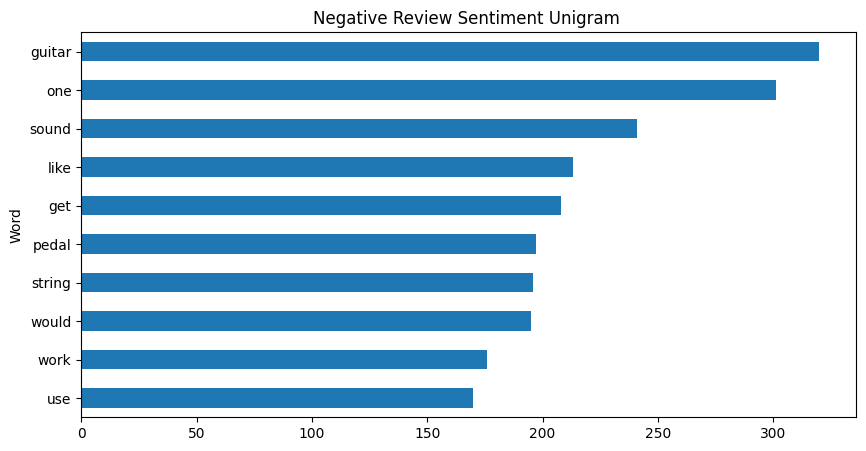

In [ ]:
#Finding Negative Unigram
Positive_unigram=Gram_analysis(Negative['review'],1,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5))
plt.title('Negative Review Sentiment Unigram ')
plt.show()

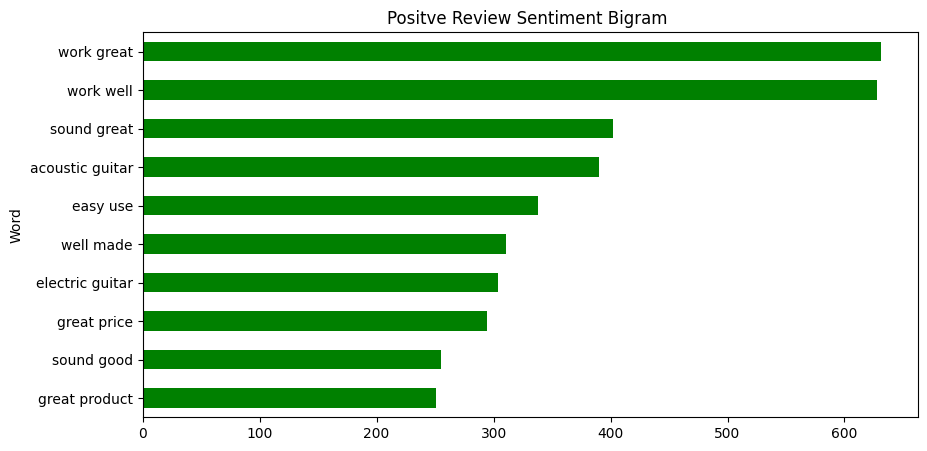

In [ ]:
#Bigram Analysis
#Finding Positive Bigram
Positive_unigram=Gram_analysis(Positive['review'],2,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5),color="green")
plt.title('Positive Review Sentiment Bigram ')
plt.show()

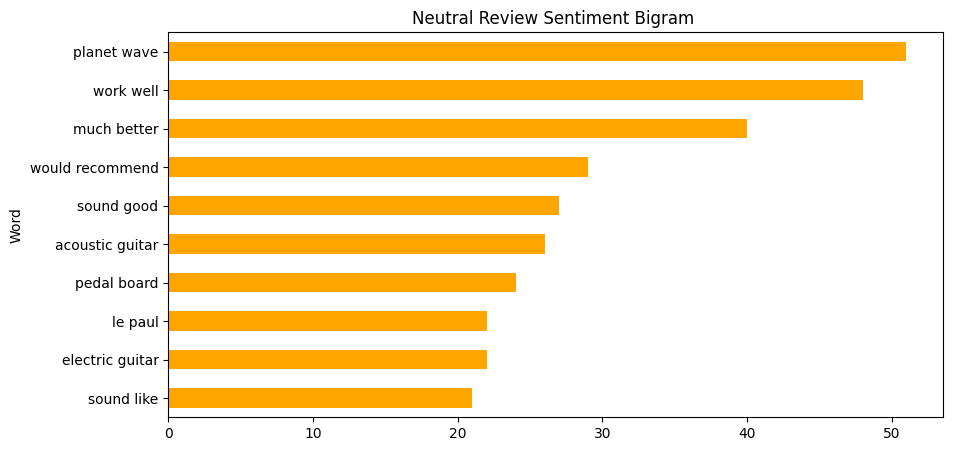

In [ ]:
#Bigram Analysis
#Finding Neutral Bigram
Positive_unigram=Gram_analysis(Neutral['review'],2,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5),color="orange")
plt.title('Neutral Review Sentiment Bigram ')
plt.show()

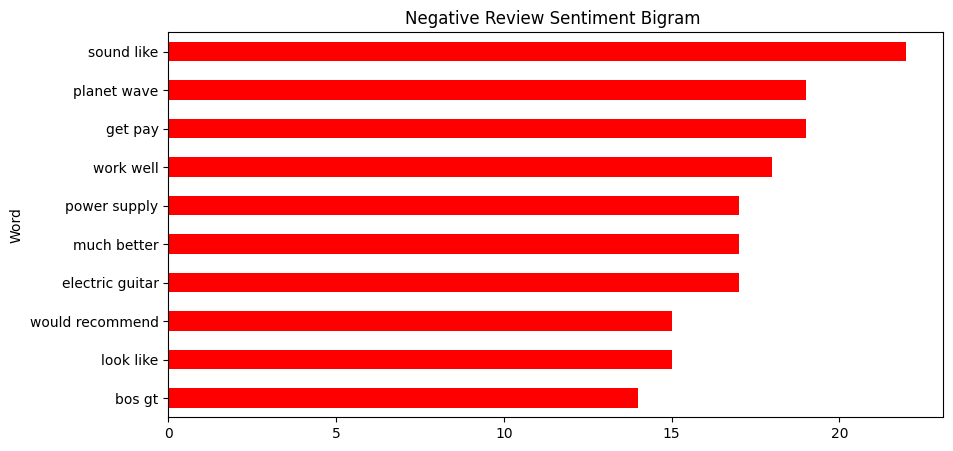

In [ ]:
#Bigram Analysis
#Finding Neutral Bigram
Positive_unigram=Gram_analysis(Negative['review'],2,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5),color="red")
plt.title('Negative Review Sentiment Bigram ')
plt.show()

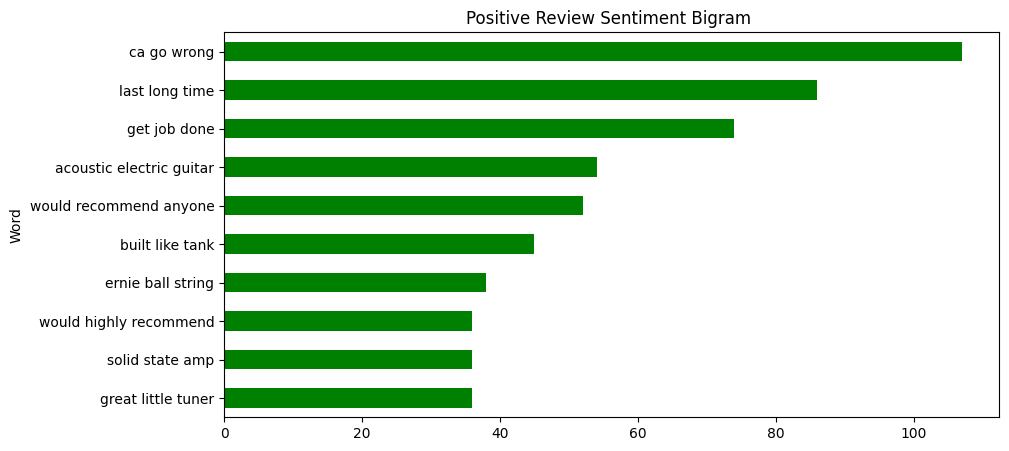

In [ ]:
#Finding Trigram
#Finding Positive Bigram
Positive_unigram=Gram_analysis(Positive['review'],3,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5),color="green")
plt.title('Positive Review Sentiment Bigram ')
plt.show()


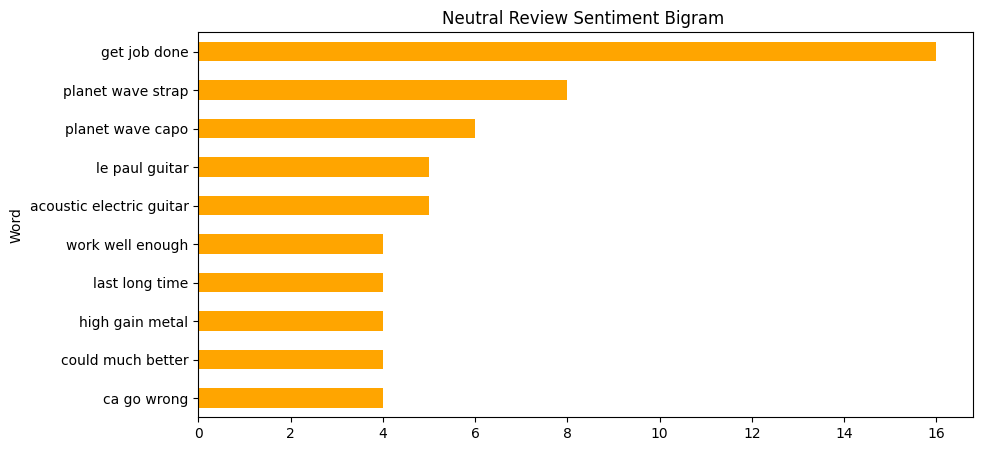

In [ ]:
#Finding Trigram
#Finding Positive Bigram
Positive_unigram=Gram_analysis(Neutral['review'],3,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5),color="orange")
plt.title('Neutral Review Sentiment Bigram ')
plt.show()

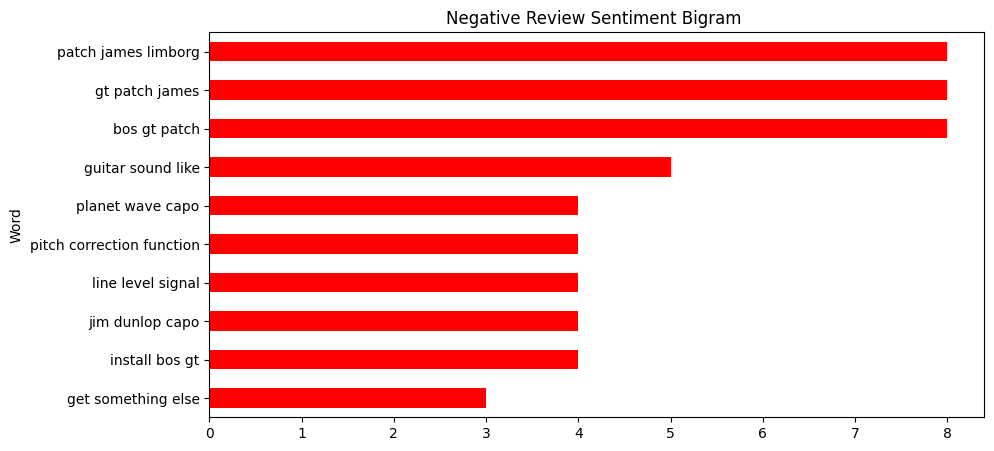

In [ ]:
#Finding Trigram
#Finding Positive Bigram
Positive_unigram=Gram_analysis(Negative['review'],3,20)
Unigram=pd.DataFrame(Positive_unigram,columns=['Word','Count'])
Unigram=Unigram.head(10)

Unigram.groupby('Word').sum()['Count'].sort_values().plot(kind='barh',figsize=(10,5),color="red")
plt.title('Negative Review Sentiment Bigram ')
plt.show()

**Word Clouds**

word cloud of reviews with Positive Sentiments



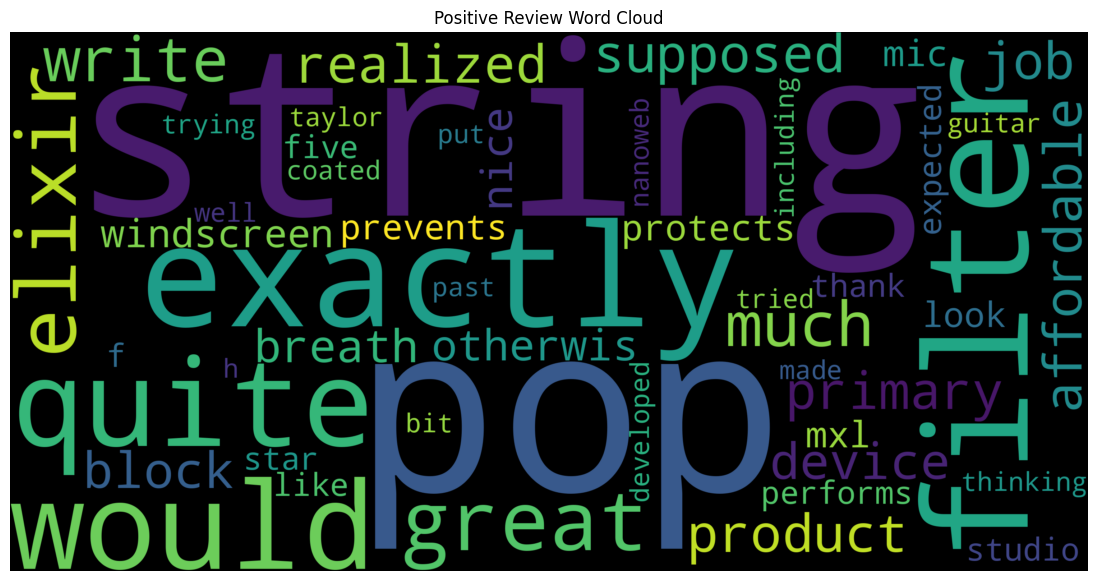

In [ ]:
#wordcloud
#Positive Review
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=stopwords).generate(str(Positive['review']))
plt.figure(figsize=(15, 7))
plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Positive Review Word Cloud')
plt.axis('off')
plt.show()


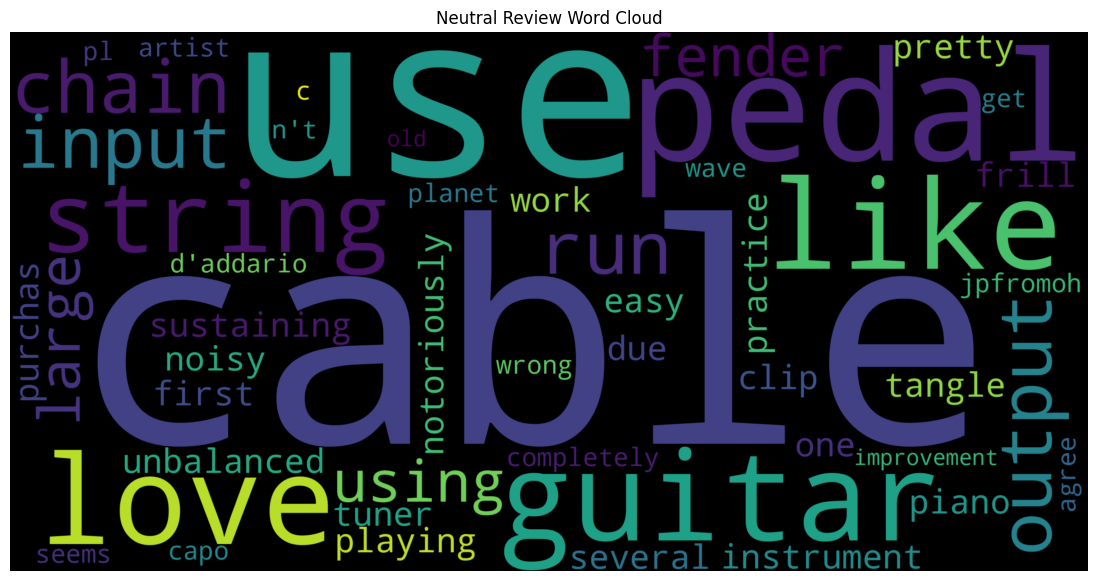

In [ ]:
#wordcloud
#Positive Review
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=stopwords).generate(str(Neutral['review']))
plt.figure(figsize=(15, 7))
plt.imshow(wordCloud, interpolation='bilinear')
plt.title('Neutral Review Word Cloud')
plt.axis('off')
plt.show()

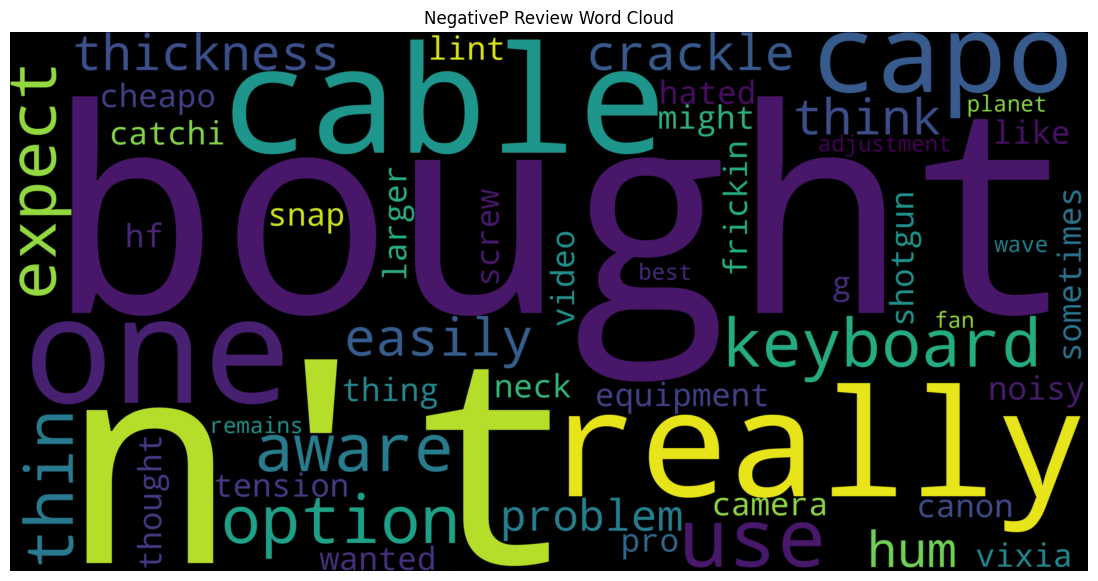

In [ ]:
#wordcloud
#Negative Review
wordCloud = WordCloud(max_words=50, width=3000, height=1500, stopwords=stopwords).generate(str(Negative['review']))
plt.figure(figsize=(15, 7))
plt.imshow(wordCloud, interpolation='bilinear')
plt.title('NegativeP Review Word Cloud')
plt.axis('off')
plt.show()

In [ ]:
df.columns

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall',
       'unixReviewTime', 'reviewTime', 'review', 'sentiment', 'polarity',
       'review_length'],
      dtype='object')

In [ ]:
#Feature Engineering
#Drop Insignificance columns
cols=['reviewerID', 'asin', 'reviewerName', 'helpful', 'overall',
       'unixReviewTime', 'reviewTime', 'polarity',
       'review_length']
df.drop(cols,axis=1,inplace=True)

In [ ]:
df.head()

,review,sentiment
0,"much write , exactly 's supposed . filter pop ...",Positive
1,product exactly quite affordable.i realized do...,Positive
2,primary job device block breath would otherwis...,Positive
3,nice windscreen protects mxl mic prevents pop ...,Positive
4,pop filter great . look performs like studio f...,Positive


In [ ]:
#Encoding the target variable
le=LabelEncoder()
df['sentiment']=le.fit_transform(df['sentiment'])

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
2,9022
1,772
0,467


In [ ]:
#TF-IDF Vectorizer
tfidf=TfidfVectorizer(max_features=10000,ngram_range=(2,2))
X=tfidf.fit_transform(df['review'])
y=df['sentiment'] #target variable


In [ ]:
#Resampling
smote=SMOTE(random_state=42)
X,y=smote.fit_resample(X,y)


In [ ]:
counter=Counter(y)
print(counter)

Counter({2: 9022, 1: 9022, 0: 9022})


In [ ]:
#splitting our dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [ ]:


#Model Selection and Evaluation
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
#import decision tree and logistic
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#import svc, randomforest,bernoulinb
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
#import knn
from sklearn.neighbors import KNeighborsClassifier

Dtree=DecisionTreeClassifier()
logReg=LogisticRegression()
svc=SVC()
RForest=RandomForestClassifier()
Bayes=BernoulliNB()
knn=KNeighborsClassifier()

Model=[Dtree,logReg,svc,RForest,Bayes,knn]
Model_name={0:'Decision Tree',1:'Logistic Regression',2:'SVC',3:'Random Forest',4:'BernoulliNB',5:'KNN'}

for i,model in enumerate(Model):
  print("Test Accuracy",Model_name[i])
  model.fit(X_train,y_train)
  y_pred=model.predict(X_test)
  print(accuracy_score(y_test,y_pred))
  print(confusion_matrix(y_test,y_pred))
  print(classification_report(y_test,y_pred))

-----------------Ending---------------------